# Response time

test test

In [13]:

import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict


# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
from functions import preprocess, behaviorAnalysis
All_rts = []
for i in range(601, 619):
    id = i
    beh_subject = behaviorAnalysis(id)
    subject_data = beh_subject.load_subject_data(path_beh_subject = r'C:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\ClasseurCompDef_Lifespan_V8_Avril2019_Outliers.xlsx' )
    RTs = subject_data['RT_Correct_CorrPU'].values
    # remove NaN values
    RTs = RTs[~np.isnan(RTs)]
    All_rts.append(RTs)
All_rts = np.concatenate(All_rts)



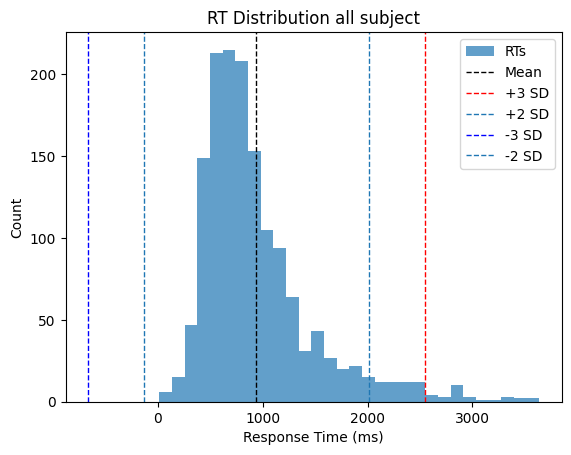

In [18]:
mean_rt = np.mean(All_rts)
std_rt = np.std(All_rts)
plt.hist(All_rts, bins=30, alpha=0.7, label='RTs')
plt.axvline(mean_rt, color='k', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean_rt + 3* std_rt, color='r', linestyle='dashed', linewidth=1, label='+3 SD')
plt.axvline(mean_rt + 2* std_rt, linestyle='dashed', linewidth=1, label='+2 SD')
plt.axvline(mean_rt - 3*std_rt, color='b', linestyle='dashed', linewidth=1, label='-3 SD')
plt.axvline(mean_rt - 2*std_rt, linestyle='dashed', linewidth=1, label='-2 SD')
plt.legend()
plt.xlabel('Response Time (ms)')
plt.ylabel('Count')
plt.title('RT Distribution all subject')
plt.show()

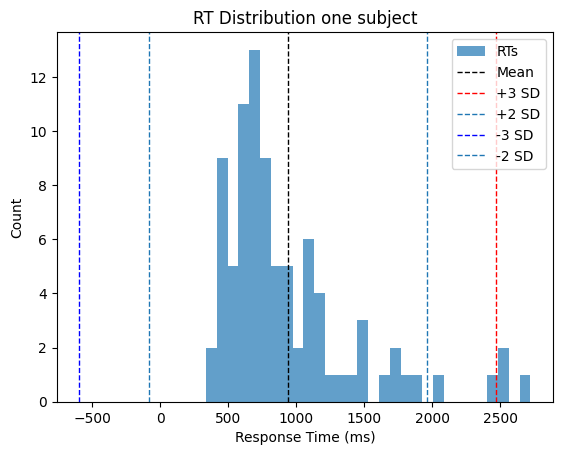

In [16]:
mean_rt = np.mean(RTs)
std_rt = np.std(RTs)
plt.hist(RTs, bins=30, alpha=0.7, label='RTs')
plt.axvline(mean_rt, color='k', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean_rt + 3* std_rt, color='r', linestyle='dashed', linewidth=1, label='+3 SD')
plt.axvline(mean_rt + 2* std_rt, linestyle='dashed', linewidth=1, label='+2 SD')
plt.axvline(mean_rt - 3*std_rt, color='b', linestyle='dashed', linewidth=1, label='-3 SD')
plt.axvline(mean_rt - 2*std_rt, linestyle='dashed', linewidth=1, label='-2 SD')
plt.legend()
plt.xlabel('Response Time (ms)')
plt.ylabel('Count')
plt.title('RT Distribution one subject')
plt.show()

# answers

In [ ]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict


# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
from functions import preprocess, behaviorAnalysis
all_wrongs = []
for i in range(601, 619):
    id = i
    beh_subject = behaviorAnalysis(id)
    subject_data = beh_subject.load_subject_data(path_beh_subject = r'C:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\ClasseurCompDef_Lifespan_V8_Avril2019_Outliers.xlsx' )
    answers = subject_data['CR_strict'].values
    len_wrong = np.sum(answers == 0)
    all_wrongs.append(len_wrong)
all_wrongs = np.array(all_wrongs)




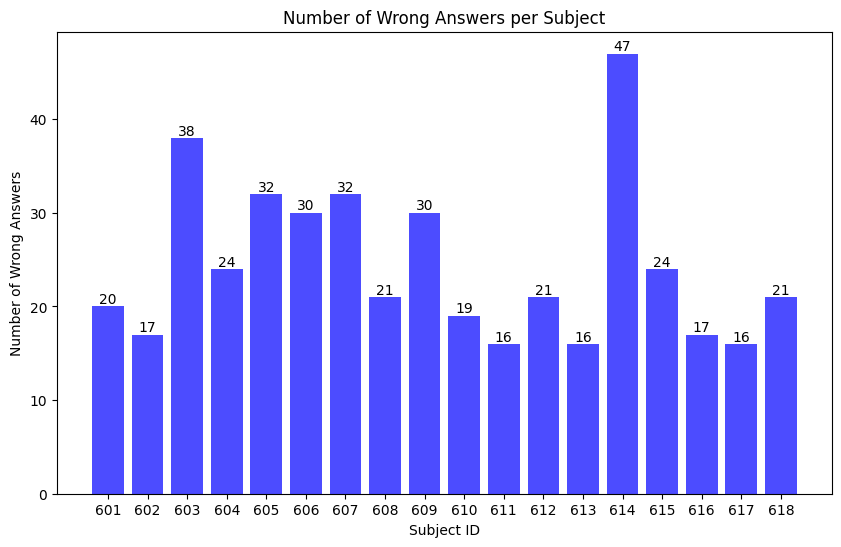

In [21]:
plt.figure(figsize=(10, 6))
bars = plt.bar(range(601, 619), all_wrongs, color='blue', alpha=0.7)
plt.xlabel('Subject ID')
plt.ylabel('Number of Wrong Answers')
plt.title('Number of Wrong Answers per Subject')
plt.xticks(range(601, 619))  # Set the x-axis to show the exact subject numbers

# Add the count to the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

# length of stim-rt


In [ ]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict

mne.set_log_level('WARNING')  # Set MNE log level to WARNING to suppress INFO messages
# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
from functions import preprocess, behaviorAnalysis
ids= np.arange(601, 619)
all_lengths = []
for id in ids:
    sub = preprocess(id)
    raw = sub.load_data()
    events = mne.find_events(raw)
    all_events = sub.get_all_events_times(events)
    all_events = all_events.dropna(subset=['Respons'])
    lengths = all_events['Respons'] - all_events['defOnset']
    all_lengths.append(lengths)
all_lengths_co = np.concatenate(all_lengths)


mean 3.2623879376477505
max 6.340192743764163
min 1.76102040816329


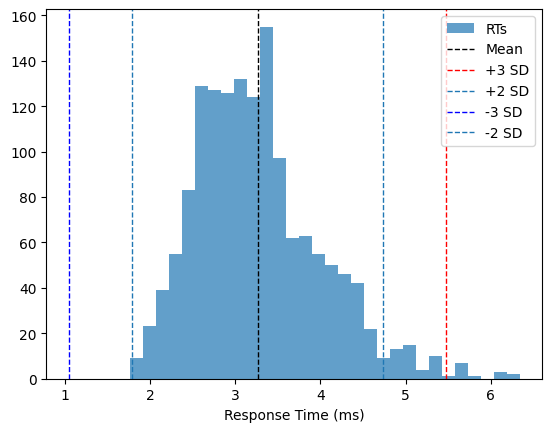

In [8]:
mean = np.mean(all_lengths_co)
max = np.max(all_lengths_co)
min = np.min(all_lengths_co)
std = np.std(all_lengths_co)
# plot the histogram
plt.hist(all_lengths_co, bins=30, alpha=0.7, label='RTs')
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean + 3* std, color='r', linestyle='dashed', linewidth=1, label='+3 SD')
plt.axvline(mean + 2* std, linestyle='dashed', linewidth=1, label='+2 SD')
plt.axvline(mean - 3*std, color='b', linestyle='dashed', linewidth=1, label='-3 SD')
plt.axvline(mean - 2*std, linestyle='dashed', linewidth=1, label='-2 SD')
plt.legend()
plt.xlabel('Response Time (ms)')    
print('mean', mean)
print('max', max)   
print('min', min)